<a href="https://colab.research.google.com/github/fimoziq/tutorials/blob/master/sjfi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import numpy as np
import pandas as pd
import scipy

%matplotlib inline
from matplotlib import pyplot as plt

In [134]:
from pandas import read_csv
df = read_csv('zadanie1python.csv',parse_dates = True, index_col = 0,delimiter=',',decimal=';')
df.head()

,Рыночные цены на материал 1 (руб.)
date;,
2007-01-01,30.55
2007-01-02,30.23
2007-01-03,30.02
2007-01-04,29.91
2007-01-05,29.92


In [135]:
df_columns, df.columns = df.columns, ('y', )
df_index, df.index.name = df.index.name, 'date'
df.head()

,y
date,
2007-01-01,30.55
2007-01-02,30.23
2007-01-03,30.02
2007-01-04,29.91
2007-01-05,29.92


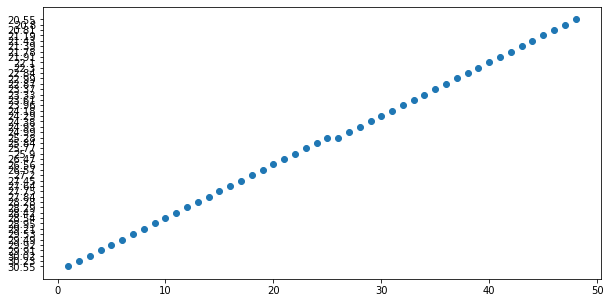

In [136]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=[10,5])
plt.scatter(range(1,df.shape[0]+1), df.y)

plt.show()

In [137]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [138]:
X = np.array(range(1,df.shape[0]+1)).reshape(df.shape[0],1)
X[0:5]

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [144]:
y = df.y.values
y = df['y'].to_numpy(dtype=np.float64)
y

array([30.55, 30.23, 30.02, 29.91, 29.92, 29.49, 29.53, 29.21, 28.95,
       28.54, 28.42, 28.29, 28.28, 27.84, 27.75, 27.64, 27.45, 27.2 ,
       26.57, 26.56, 26.47, 25.9 , 25.77, 25.84, 25.28, 25.28, 24.99,
       24.93, 24.38, 24.29, 24.18, 23.96, 23.61, 23.33, 23.37, 22.87,
       22.99, 22.84, 22.3 , 22.1 , 21.91, 21.78, 21.39, 21.43, 21.19,
       20.81, 20.8 , 20.55])

In [145]:
assert len(X)==len(y)
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
coefs = model.coef_
coefs

array([-0.21666251])

In [147]:
const = model.intercept_
const

30.868439716312054

𝑌𝑖ˆ=30.87-0.22𝑋𝑖

In [148]:
y_pred = model.predict(X) 
y_pred[0:5]

array([30.65177721, 30.43511471, 30.2184522 , 30.00178969, 29.78512719])

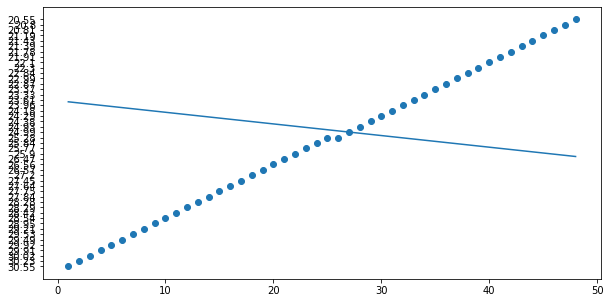

In [149]:
plt.figure(figsize=[10,5])
plt.scatter(range(1,df.shape[0]+1), df.y)
plt.plot(X,y_pred)

plt.show()

In [150]:
sst = (np.array([y-y.mean()])**2).sum()
sst

433.3654979166667

In [151]:
sse = (np.array([y-y_pred])**2).sum()
sse

0.9298866460413981

In [152]:
ssr = (np.array([y_pred-y.mean()])**2).sum()
ssr

432.43561127062515

In [153]:
R2 = 1 - sse/sst
R2

0.9978542670089989

In [154]:
MAPE = abs([y-y_pred]/y_pred).sum()*100/len(y)
MAPE

0.47632439799279264

In [155]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y)

0.019372638459195794

In [156]:
x_test = np.array(range(48,61)).reshape(13,1)
x_test

array([[48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60]])

In [157]:
y_test = model.predict(x_test)
y_test[0:5]

array([20.46863946, 20.25197695, 20.03531444, 19.81865194, 19.60198943])

In [158]:
from scipy.stats import t as student

In [159]:
sigma_error = sse / len(y)
sigma_error

0.019372638459195794

In [160]:
import math
y_up = y_test+student.ppf(0.95, len(x_test))*math.sqrt(sigma_error)
y_down =y_test-student.ppf(0.95, len(x_test))*math.sqrt(sigma_error)

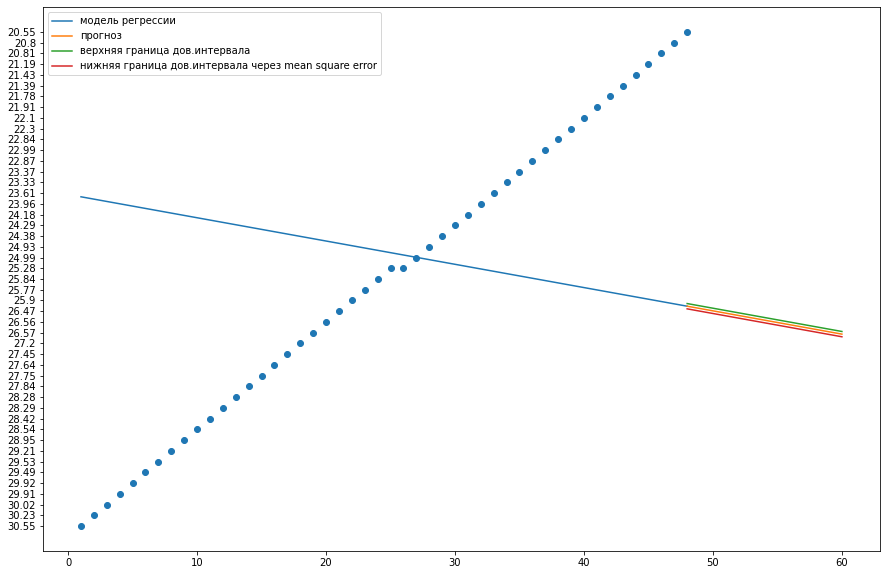

In [161]:
plt.figure(figsize=[15,10])
plt.scatter(range(1,df.shape[0]+1), df.y)
plt.plot(X,y_pred)
plt.plot(x_test,y_test)
plt.plot(x_test,y_up)
plt.plot(x_test,y_down)
plt.legend(['модель регрессии','прогноз','верхняя граница дов.интервала' ,\
            'нижняя граница дов.интервала через mean square error'])

plt.show()